<a href="https://colab.research.google.com/github/FabriDeCastelli/ML-Regression-Assignment/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Student: Fabrizio De Castelli

--- 
# IMPORTANT: all the submitted code should be in 2 cells
1) How you trained, evaluated and saved your model
2) How to load your model from a file, load the data and evaluate the model. Cell 2) should be running independently (even if cell 1 is not run)

-------- T1 ---------
theta_hat = [ 1.31635295 -0.05128958 -0.57659976  0.42026517  0.03686637]
Training performance: 0.696251517689963
Mean squared error on test set: 0.7516362518990539

-------- T2 ---------
19/19 [==============================] - 0s 1ms/step - loss: 0.7334
Error on the test set: 0.733443021774292
-------- T3 ---------


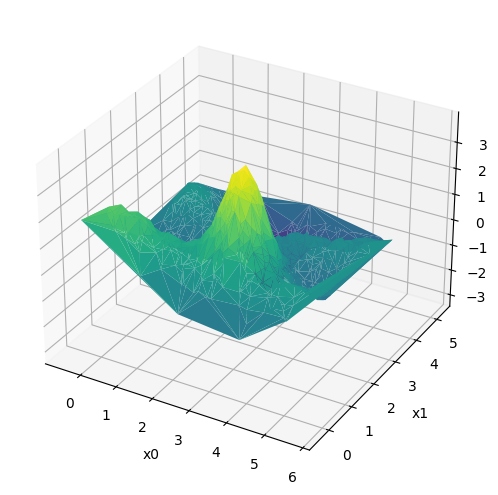

In [34]:
# Import libraries
import io
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Load data 
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz' # path to the .npz file storing the data
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x

# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y


# T1
print('-------- T1 ---------')

from sklearn.model_selection import train_test_split 

# Merge inputs and target into a (3,1) shaped numpy array
data = np.hstack((x, y.reshape(y.shape[0],1)))

# Generate training and test set
train, test = train_test_split(data, train_size=0.7, shuffle=True, random_state=0)

# Split inputs and targets for training set
x_train = train[:, 0:2]
y_train = train[:, -1]

# Split inputs and targets for test set
x_test = test[:, 0:2]
y_test = test[:, -1]

# Plot data into the space 

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(x_train[:, 0], x_train[:, 1], y_train, cmap='viridis')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.tight_layout()


# Library for Linear Regression
from sklearn.linear_model import LinearRegression

# Linear function to generate family of models
def linear(x, theta):
  """
    Linear function for our family of model
    Arguments:
      x: the input vector of length 2
      theta: the parameter vector describing our model of length 5
  """
  return theta[0] + x[0]*theta[1] + x[1]*theta[2] + np.sin(x[1])*theta[3] + x[0]*x[1]*theta[4]

# Init the model
lr = LinearRegression(fit_intercept=False)  

# Create training matrix to match the linear function
ones_vector_train = np.ones(shape=(x_train.shape[0], 1))
sinx2_vector_train = np.sin(x_train[:, 1]).reshape(train.shape[0], 1)
x1_times_x2_vector_train = np.multiply(x_train[:, 0], x_train[:, 1]).reshape(train.shape[0], 1)
X_train = np.hstack((ones_vector_train, x_train, sinx2_vector_train, x1_times_x2_vector_train)) 

# Create test matrix to match the linear function
ones_vector_test = np.ones(shape=(x_test.shape[0], 1))
sinx2_vector_test = np.sin(x_test[:, 1]).reshape(test.shape[0], 1)
x1_times_x2_vector_test = np.multiply(x_test[:, 0], x_test[:, 1]).reshape(test.shape[0], 1)
X_test = np.hstack((ones_vector_test, x_test, sinx2_vector_test, x1_times_x2_vector_test)) 

# Estimate parameters on the training set
lr.fit(X_train, y_train)
theta_hat = lr.coef_

# Library for mean squared error
from sklearn.metrics import mean_squared_error 

# Generate prediction on training set and evaluate performance with MSE
train_prediction = lr.predict(X_train)
train_performance = mean_squared_error(train_prediction, y_train)
# train_performance_theta_hat = mean_squared_error(linear(x_train, theta_hat), y_train)

# Generate prediction on test set and evaluate performance with MSE
test_prediction = lr.predict(X_test)
test_performance = mean_squared_error(test_prediction, y_test)
# test_performance_theta_hat = mean_squared_error(linear(x_test, theta_hat), y_test)

print('theta_hat = {}'.format(theta_hat))

# print('Training performance with theta hat: {}'. format(train_performance_theta_hat))
# print('Test performance with theta hat: {}'. format(test_performance_theta_hat))

print('Training performance: {}'.format(train_performance))
print('Mean squared error on test set: {}\n'.format(test_performance))

# T2
print('-------- T2 ---------')

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='tanh'))

model.compile(loss='mean_squared_error', optimizer='sgd')

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)

result = model.evaluate(x_test, y_test)
print('Error on the test set: {}'.format(result))





# T3 (Bonus)
print('-------- T3 ---------')





# Example on how to use baseline model:

In [ ]:
# Import libraries
import joblib
import io
import requests
import numpy as np

def evaluate_predictions(y_true, y_pred):
    """
    Evaluates the mean squared error between the values in y_true and the values
    in y_pred.
    ### YOU CAN NOT EDIT THIS FUNCTION ###
    :param y_true: Numpy array, the true target values from the test set;
    :param y_pred: Numpy array, the values predicted by your model.
    :return: float, the mean squared error between the two arrays.
    """
    assert y_true.shape == y_pred.shape
    return ((y_true - y_pred) ** 2).mean()


def load_model(filename):
    """
    Loads a Scikit-learn model saved with joblib.dump.
    This is just an example, you can write your own function to load the model.
    Some examples can be found in src/utils.py.
    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = joblib.load(filename)

    return model

# Load the data
# This will be replaced with our private test data when grading the assignment

# Load data from url
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz'
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y

# Load the trained model
baseline_model_path = './baseline_model.pickle'
baseline_model = load_model(baseline_model_path)

# Change input
x = ...

# Predict on the given samples
y_pred = baseline_model.predict(x)

############################################################################
# STOP EDITABLE SECTION: do not modify anything below this point.
############################################################################

# Evaluate the prediction using MSE
mse = evaluate_predictions(y_pred, y)
print(f'MSE on whole dataset: {mse}')

# NOTE: NOW THIS CELL IS NOT WORKING SINCE YOU NEED TO CHANGE THE INPUT.
# DO IT AND EVERYTHING RUNS SMOOTH
